In [1]:
from poola import core as pool
import pandas as pd
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import zipfile
gpplot.set_aesthetics(context = 'paper')

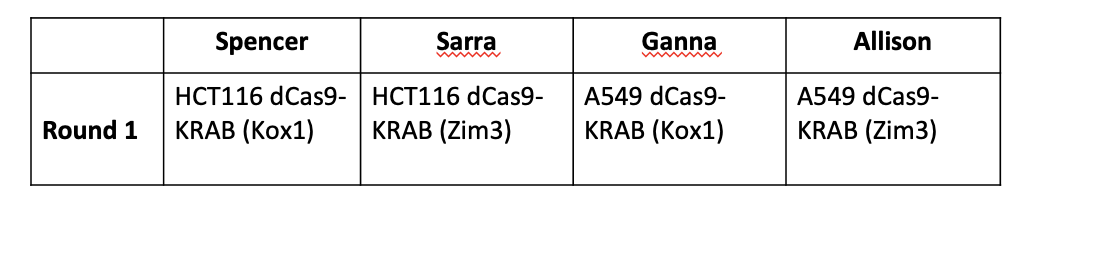

          - KRAB (Kox1)   KRAB (Zim3)
    - HCT116     x            x
    - A549       x            x


In [2]:
# readcount files
file_path = "Data/PrimaryLibrary/tiling/HCT116_Zim3/"
file = zipfile.ZipFile('../Data.zip','r').open(file_path + 'counts-SM20231201.txt')
HCT116_Zim3 = pd.read_table(file)
HCT116_Zim3.head()

,Construct Barcode,Construct IDs,HCT116_RDB182_RepA,Unlabeled Sample Barcodes,pDNA CP1948,HCT116_RDB182_RepB
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,449,0,53,459
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,93,0,97,105
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,508,0,74,755
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,527,0,89,499
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,325,0,41,348


In [3]:
HCT116_Zim3.columns

Index(['Construct Barcode', 'Construct IDs', 'HCT116_RDB182_RepA',
       'Unlabeled Sample Barcodes', 'pDNA  CP1948', 'HCT116_RDB182_RepB'],
      dtype='object')

In [4]:
figure1_outpath = '../Figure/Figure 1/Individual Figures/'

In [5]:
# additional information on the readcount files
file = zipfile.ZipFile('../Data.zip','r').open('Data/PrimaryLibrary/design/CRISPRi_6col_sgRNA.csv')
col6 = pd.read_csv(file)
file = zipfile.ZipFile('../Data.zip','r').open('Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
ess_noness = pd.read_csv(file)
ess_noness = ess_noness[['Target Gene Symbol','Target Gene ID','Category','TSS Position', 
       'sgRNA \'Cut\' Site TSS Offset','sgRNA Sequence', 
           'sgRNA Context Sequence', 'On-Target Ruleset',
       'On-Target Efficacy Score']]
ess_noness = pd.merge(col6[['Target Gene Symbol', 'sgRNA Sequence']], ess_noness)
ess_noness.head()

,Target Gene Symbol,sgRNA Sequence,Target Gene ID,Category,TSS Position,sgRNA 'Cut' Site TSS Offset,sgRNA Context Sequence,On-Target Ruleset,On-Target Efficacy Score
0,ATP5F1B,ATAGCGACGTCCGTTGGACA,506.0,Essential,56645984.0,-255.0,GATCATAGCGACGTCCGTTGGACAGGGTAA,RS3seq-Chen2013,0.9257
1,ATP5F1B,ACCCGGACTACGCCATGTTG,506.0,Essential,56645984.0,24.0,CTCCACCCGGACTACGCCATGTTGGGGTTT,RS3seq-Chen2013,0.7588
2,ATP5F1B,AGTACCCCTATTCAACCGGA,506.0,Essential,56645984.0,396.0,GTTCAGTACCCCTATTCAACCGGAAGGTCA,RS3seq-Chen2013,0.7492
3,ATP5F1B,TAATCAGAGGAACTACGTTT,506.0,Essential,56645984.0,-278.0,AGGGTAATCAGAGGAACTACGTTTAGGAAA,RS3seq-Chen2013,0.7506
4,ATP5F1B,TATGGCTGTCACCTAGATCA,506.0,Essential,56645984.0,-362.0,CCCCTATGGCTGTCACCTAGATCAAGGACC,RS3seq-Chen2013,0.9978


# process HCT116_Zim3


In [6]:
lognorms_HCT116_Zim3 = pool.lognorm_columns(reads_df=HCT116_Zim3, columns=['HCT116_RDB182_RepA','pDNA  CP1948', 'HCT116_RDB182_RepB'])
filtered_lognorms_lognorms_HCT116_Zim3 = pool.filter_pdna(lognorm_df=lognorms_HCT116_Zim3, pdna_cols=['pDNA  CP1948'], z_low=-3)
print('Filtered ' + str(lognorms_HCT116_Zim3.shape[0] - filtered_lognorms_lognorms_HCT116_Zim3.shape[0]) + ' rows due to low pDNA abundance')


Filtered 662 rows due to low pDNA abundance


In [7]:
lfc_df_HCT116_Zim3 = pool.calculate_lfcs(lognorm_df=filtered_lognorms_lognorms_HCT116_Zim3, 
                                         ref_col='pDNA  CP1948', target_cols=['HCT116_RDB182_RepA', 'HCT116_RDB182_RepB'])
lfc_df_HCT116_Zim3.head()


,Construct Barcode,Construct IDs,HCT116_RDB182_RepA,Unlabeled Sample Barcodes,HCT116_RDB182_RepB
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,0.065670,0,0.125706
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,-2.414985,0,-2.286924
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,-0.203628,0,0.346980
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,-0.398565,0,-0.435818
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,-0.016998,0,0.096606


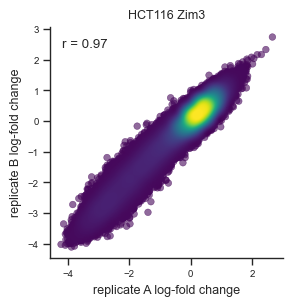

In [8]:
plt.subplots(figsize=(3,3))
gpplot.point_densityplot(data=lfc_df_HCT116_Zim3, x='HCT116_RDB182_RepA', y='HCT116_RDB182_RepB')
gpplot.add_correlation(data=lfc_df_HCT116_Zim3, x='HCT116_RDB182_RepA', y='HCT116_RDB182_RepB')
sns.despine()
plt.xlabel('replicate A log-fold change',fontsize=9)
plt.ylabel('replicate B log-fold change',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('HCT116 Zim3',fontsize=9)
gpplot.savefig(figure1_outpath+'HCT116_Zim3_rep_corr.pdf',
           dpi=300, bbox_inches='tight')

In [8]:
lfc_df_HCT116_Zim3 = lfc_df_HCT116_Zim3[['Construct Barcode','HCT116_RDB182_RepA','HCT116_RDB182_RepB' ]]

In [9]:
avg_replicate_lfc_df_HCT116_Zim3 = pool.average_replicate_lfcs(lfcs=lfc_df_HCT116_Zim3, guide_col='Construct Barcode', condition_indices=[0],
                                                   sep='_')
avg_replicate_lfc_df_HCT116_Zim3.head()

,Construct Barcode,condition,avg_lfc,n_obs
0,AAAAAAAAAAATTAGACCTC,HCT116,-0.277625,2
1,AAAAAAAAAACAGGACACAG,HCT116,-0.144109,2
2,AAAAAAAAAACGTTGTGCAG,HCT116,0.035482,2
3,AAAAAAAAAAGGTCATTCAG,HCT116,-0.265074,2
4,AAAAAAAAAAGTGATCAGTT,HCT116,-0.135512,2


In [10]:
avg_replicate_lfc_df_HCT116_Zim3.rename(columns={'Construct Barcode':'sgRNA Sequence'}, inplace = True)

# Calculate Z-score using Intergenic control

In [11]:
annot_guide_lfcs_HCT116_Zim3 = pool.annotate_guide_lfcs(avg_replicate_lfc_df_HCT116_Zim3, ess_noness, 'Target Gene Symbol',
                                            merge_on='sgRNA Sequence', z_score_neg_ctls=True,
                                            z_score_neg_ctl_genes='ONE_INTERGENIC')

In [12]:
labels = ['[-1000, -500)', '[-500, -400)', '[-400, -300)',
          '[-300, -200)','[-200, -100)', '[-100, -50)', '[-50, 0)',
          '[0, 50)','[50, 100)', '[100, 200)', '[200, 300)',
          '[300, 400)','[400, 500)', '[500, 1000)',]

cut_list =  [-1000, -500, -400,
             -300, -200, -100, -50, 0, 
             50, 100, 200, 300, 
             400, 500,  1000]

# bin data based on range of possible values
annot_guide_lfcs_HCT116_Zim3['TSS Bucket'] = pd.cut(annot_guide_lfcs_HCT116_Zim3['sgRNA \'Cut\' Site TSS Offset'], cut_list, labels=labels)

In [13]:
annot_guide_lfcs_HCT116_Zim3

,sgRNA Sequence,condition,avg_lfc,n_obs,Target Gene Symbol,Target Gene ID,Category,TSS Position,sgRNA 'Cut' Site TSS Offset,sgRNA Context Sequence,On-Target Ruleset,On-Target Efficacy Score,z_scored_avg_lfc,TSS Bucket
0,AAAAAAAAAAATTAGACCTC,HCT116,-0.277625,2,MRGPRD,116512.0,Non-essential,68980986.0,-735.0,AAAAAAAAAAAAAAATTAGACCTCAGGGCA,RS3seq-Chen2013,-0.63090,-1.315569,"[-1000, -500)"
1,AAAAAAAAAACAGGACACAG,HCT116,-0.144109,2,LARS2,23395.0,Essential,45388577.0,667.0,CAGAAAAAAAAAAACAGGACACAGGGGAGA,RS3seq-Chen2013,0.01400,-0.992358,"[500, 1000)"
2,AAAAAAAAAACGTTGTGCAG,HCT116,0.035482,2,PRAMEF4,400735.0,Non-essential,12886201.0,393.0,CCTCAAAAAAAAAACGTTGTGCAGAGGAGG,RS3seq-Chen2013,-0.72560,-0.557609,"[300, 400)"
3,AAAAAAAAAAGGTCATTCAG,HCT116,-0.265074,2,OR6K6,128371.0,Non-essential,158754721.0,-24.0,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,RS3seq-Chen2013,-0.15320,-1.285187,"[-50, 0)"
4,AAAAAAAAAAGTGATCAGTT,HCT116,-0.135512,2,IGBP1,3476.0,Essential,70133448.0,-448.0,AATAAAAAAAAAAAGTGATCAGTTTGGAAA,RS3seq-Chen2013,-0.41140,-0.971547,"[-500, -400)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107907,TTTGTTTGAATCCGGGCCTG,HCT116,-0.056957,2,SNRPF,6636.0,Essential,95858953.0,355.0,TCTCTTTGTTTGAATCCGGGCCTGGGGTAT,RS3seq-Chen2013,-0.37760,-0.781384,"[300, 400)"
107908,TTTGTTTGACTCACTTTATT,HCT116,0.132334,2,WFDC11,259239.0,Non-essential,45670239.0,881.0,AATATTTGTTTGACTCACTTTATTAGGGTG,RS3seq-Chen2013,-1.32600,-0.323153,"[500, 1000)"
107909,TTTGTTTGAGGGGCGAGTGG,HCT116,0.133119,2,INS,3630.0,Non-essential,2161209.0,683.0,GGCATTTGTTTGAGGGGCGAGTGGAGGGAG,RS3seq-Chen2013,0.07708,-0.321252,"[500, 1000)"
107910,TTTGTTTGGTGCATTTGAGT,HCT116,-0.145345,2,ZSWIM2,151112.0,Non-essential,186849170.0,996.0,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,RS3seq-Chen2013,-0.30490,-0.995350,"[500, 1000)"


Text(0.5, 1.0, 'Boxplot of distance of TSS and Z-score for HCT116_Zim3')

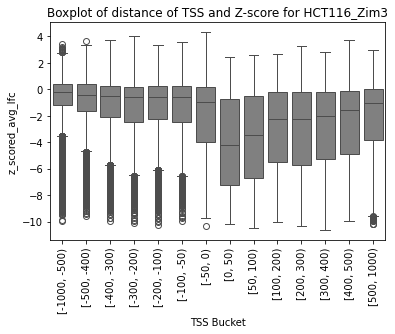

In [14]:
sns.boxplot(
                x = annot_guide_lfcs_HCT116_Zim3[annot_guide_lfcs_HCT116_Zim3['Category'] == 'Essential']['TSS Bucket'], 
                y = annot_guide_lfcs_HCT116_Zim3[annot_guide_lfcs_HCT116_Zim3['Category'] == 'Essential']['z_scored_avg_lfc'], color = 'grey')

plt.xticks(rotation=90)
plt.title('Boxplot of distance of TSS and Z-score for HCT116_Zim3')

In [15]:


path_out = '../Data/PrimaryLibrary/processed_z_score/'
annot_guide_lfcs_HCT116_Zim3.to_csv(path_out + 'HCT116_Zim3_zscore.csv', index = False)